# Import and Data

In [2]:
import numpy as np
import pandas as pd 
import scipy.io as sio
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from mlxtend.data import loadlocal_mnist
from sklearn.preprocessing import OneHotEncoder

In [3]:
mat_content = sio.loadmat("binaryalphadigs.mat")
# mat_content

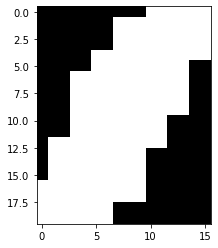

In [4]:
plt.imshow(mat_content['dat'][1][1], cmap='gray')

In [5]:
def lire_alpha_digit(dataset, list_idx):
    imgs_set = dataset[list_idx,:].flatten()
    imgs_flatten = []

    for img in imgs_set:
        imgs_flatten.append(img.flatten())

    imgs_set_output = np.array(imgs_flatten)

    return imgs_set_output

In [6]:
list_idx = [15]
images =lire_alpha_digit(dataset=mat_content['dat'], list_idx=list_idx)

# Restricted Boltzmann Machine (RBM) on Binary AlphaDigits

Interesting resources: https://medium.com/machine-learning-researcher/boltzmann-machine-c2ce76d94da5

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(x))


def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)


class RBM():

    def __init__(self, p, q):
        self.p = p
        self.q = q
        # Initialize weights randomly with normal distribution
        self.W = np.random.normal(loc=0, scale=0.01, size=(p, q))
        self.a = np.zeros(p)
        self.b = np.zeros(q)

    def entree_sortie_RBM(self, X, act='sigmoid'):
        proj = X@self.W + self.b
        p_h = sigmoid(-proj)
        h = 1 * (np.random.rand(*p_h.shape) < p_h)
        return p_h, h

    def sortie_entree_RBM(self, Y):
        proj = Y@self.W.T + self.a
        p_v = sigmoid(-proj)
        v = 1 * (np.random.rand(*p_v.shape) < p_v)
        return p_v, v

    def train_RBM(self, data, epochs=10000, learning_rate=0.01, batch_size=50, verbose = True):
        n_samples = data.shape[0]
        loss = []

        for epoch in range(1, epochs + 1):
            # Shuffle the data
            data2 = np.copy(data)
            np.random.shuffle(data2)
            for batch in range(0, n_samples, batch_size):
                batch_indices = np.arange(batch,
                                          min(batch + batch_size, n_samples))
                x = data2[batch_indices, :]
                v0 = x
                p_hv0, h0 = self.entree_sortie_RBM(v0)
                p_vh0, v1 = self.sortie_entree_RBM(h0)
                p_hv1, h1 = self.entree_sortie_RBM(v1)

                # Computing the gradient
                grad_a = np.mean(v0 - v1, axis=0)
                grad_b = np.mean(p_hv0 - p_hv1, axis=0)
                grad_W = v0.T@p_hv0 - v1.T@p_hv1

                # Updating the weights

                self.a += learning_rate * grad_a
                self.b += learning_rate * grad_b
                self.W += learning_rate * grad_W

            output, _ = self.entree_sortie_RBM(data2)
            reconstructed_input, _ = self.sortie_entree_RBM(output)
            size = n_samples * self.p
            loss.append(np.sum((reconstructed_input - data2)**2) / size)
            if verbose:
                if not(epoch % 20) or epoch == 1:
                    print(f'Epoch {epoch} out of {epochs}, loss: {loss[-1]}')

        return self, loss

    def generer_image_RBM(self, n_imgs, n_iter, dataset='alphadigit'):
        fig = plt.figure()
        fig.patch.set_facecolor('black')
        if dataset == 'alphadigit':
            shape = (20, 16)
        elif dataset == 'mnist':
            shape = (28, 28)
        for i in range(n_imgs):
            v = 1 * (np.random.rand(self.p) < 0.5)
            v = v.reshape(1, v.shape[0])
            for j in range(n_iter):
                _, h = self.entree_sortie_RBM(v)
                _, v = self.sortie_entree_RBM(h)
            plt.subplot(n_imgs // 5, 5, i + 1)
            plt.imshow(v.reshape(shape), cmap='gray')
            plt.axis('off')
        plt.show()


This code defines a class called "RBM" which stands for Restricted Boltzmann Machine. The class has several methods:

1. The "init" method initializes the RBM by taking in two arguments, "p" and "q", which represent the number of visible units and hidden units, respectively. The method initializes the RBM's weights randomly with a normal distribution, and sets the biases for the visible and hidden units to zero.

2. The "entree_sortie_RBM" method takes in an input "X" and returns two outputs: "p_h", which represents the probability of the hidden units being on, and "h", which represents the binary state of the hidden units. This method computes the activations of the hidden units given the visible units and the current RBM weights.

3. The "sortie_entree_RBM" method takes in an output "Y" and returns two outputs: "p_v", which represents the probability of the visible units being on, and "v", which represents the binary state of the visible units. This method computes the activations of the visible units given the hidden units and the current RBM weights.

4. The "train_RBM" method takes in a dataset "data" and trains the RBM using contrastive divergence. The method uses a specified number of epochs, learning rate, and batch size. The method computes the gradients of the RBM weights using the contrastive divergence algorithm and updates the weights accordingly. The method also computes the reconstruction error of the RBM on the training data during each epoch.

5. The "generer_image_RBM" method generates new images from the RBM. The method takes in two arguments, "n_imgs" and "n_iter", which represent the number of images to generate and the number of iterations to run the RBM for each image. The method generates random binary states for the visible units and runs the RBM to generate new images.

Overall, this class defines a way to train a Restricted Boltzmann Machine and generate new images from the trained model.

Epoch 1 out of 500, loss: 0.19242415803730578
Epoch 20 out of 500, loss: 0.07947390526403005
Epoch 40 out of 500, loss: 0.03973558624005683
Epoch 60 out of 500, loss: 0.01941324818503227
Epoch 80 out of 500, loss: 0.009358832252794007
Epoch 100 out of 500, loss: 0.005362302701635986
Epoch 120 out of 500, loss: 0.003232004488307855
Epoch 140 out of 500, loss: 0.002170552475234869
Epoch 160 out of 500, loss: 0.0015261627068049928
Epoch 180 out of 500, loss: 0.0011195015786729318
Epoch 200 out of 500, loss: 0.0008713087574439101
Epoch 220 out of 500, loss: 0.0007028377638995647
Epoch 240 out of 500, loss: 0.0005894988954255928
Epoch 260 out of 500, loss: 0.0004620209509054244
Epoch 280 out of 500, loss: 0.0004158231219540491
Epoch 300 out of 500, loss: 0.0003439136065866965
Epoch 320 out of 500, loss: 0.0003089178591532683
Epoch 340 out of 500, loss: 0.0002617076645976937
Epoch 360 out of 500, loss: 0.00021473408001751001
Epoch 380 out of 500, loss: 0.00018619454727944085
Epoch 400 out of

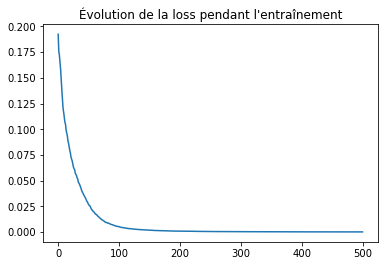

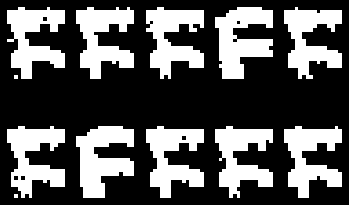

In [136]:
p = 20*16
q = 250
rbm = RBM(p, q) #la taille du réseau est donc [320,250]

epochs = 500
learning_rate = 0.01
batch_size = 10

RBM_trained, loss = rbm.train_RBM(images, epochs, learning_rate, batch_size)

plt.plot(loss)
plt.title("Évolution de la loss pendant l'entraînement")
plt.show()

n_iter = 1000
n_imgs = 10
RBM_trained.generer_image_RBM(n_imgs, n_iter)

This code trains a Restricted Boltzmann Machine (RBM) on a dataset of images and then generates new images using the trained model.

- The first block initializes the RBM with 20*16 visible units and 250 hidden units.
- The next block sets hyperparameters for training the RBM, including the number of epochs, learning rate, and batch size.
- The third block calls the train_RBM method of the RBM object to train the model on a given dataset images. The method returns the trained model and the loss values during training.
- The fourth block plots the loss values during training.
- The fifth block sets the number of iterations and the number of images to generate using the trained model.
- The last block calls the generer_image_RBM method of the trained RBM object to generate new images, with the specified number of iterations and number of images to generate. The generated images are then displayed using matplotlib.

# Deep Belief Network (DBN) on Binary AlphaDigits

In [8]:
class DBN():
    def __init__(self, neurons):
        self.RBMs_list = []
        for i in range(len(neurons) - 1):
            self.RBMs_list.append(RBM(neurons[i], neurons[i+1]))

    def pretrain_DBN(self, data, n_epoch=10000, lr_rate=0.01, batch_size=50, verbose = True):
        losses = []
        for rbm in self.RBMs_list:
            rbm, loss = rbm.train_RBM(data, n_epoch, lr_rate, batch_size, verbose = verbose)
            _, data = rbm.entree_sortie_RBM(data)
            losses.append(loss)
        return self, losses

    def generer_image_DBN(self, n_imgs, n_iter, dataset='alphadigit'):
        fig = plt.figure()
        fig.patch.set_facecolor('black')
        if dataset == 'alphadigit':
            shape = (20, 16)
        elif dataset == 'mnist':
            shape = (28, 28)
        for i in range(n_imgs):
            data = 1 * (np.random.rand(self.RBMs_list[0].p) < 0.5)
            data = data.reshape(1, data.shape[0])
            for itr in range(n_iter):
                for rbm in self.RBMs_list:
                    _, data = rbm.entree_sortie_RBM(data)
                for rbm in reversed(self.RBMs_list):
                    _, data = rbm.sortie_entree_RBM(data)
            plt.subplot(n_imgs // 5, 5, i + 1)
            plt.imshow(data.reshape(shape), cmap='gray')
            plt.axis('off')
        plt.show()

This code defines a Deep Belief Network (DBN) class which is used to create and pretrain an unsupervised neural network. The DBN is constructed by instantiating a list of Restricted Boltzmann Machines (RBMs) with the given number of neurons in each layer.

The pretrain_DBN method is used to pretrain each RBM in the network using Contrastive Divergence. It takes in the training data, number of epochs, learning rate, and batch size as inputs. It returns the pre-trained DBN object and a list of losses for each RBM during the pre-training.

The generer_image_DBN method is used to generate images using the pre-trained DBN. It takes in the number of images to generate and the number of iterations to run on each image as inputs. It generates binary images using random input data and then iteratively passes the data through each layer of the network to generate the final image. It displays the generated images using matplotlib. The shape of the generated image is dependent on the dataset used, which is either 'alphadigit' or 'mnist'.

Epoch 1 out of 2000, loss: 0.19250909570327815
Epoch 20 out of 2000, loss: 0.16904519987533168
Epoch 40 out of 2000, loss: 0.14566101855218158
Epoch 60 out of 2000, loss: 0.11586919741867115
Epoch 80 out of 2000, loss: 0.10728526945552386
Epoch 100 out of 2000, loss: 0.09891518150072905
Epoch 120 out of 2000, loss: 0.09027717678903521
Epoch 140 out of 2000, loss: 0.08310476506159778
Epoch 160 out of 2000, loss: 0.07665494079532542
Epoch 180 out of 2000, loss: 0.0709757450694182
Epoch 200 out of 2000, loss: 0.06584530165140833
Epoch 220 out of 2000, loss: 0.06146043824634364
Epoch 240 out of 2000, loss: 0.05659238626910377
Epoch 260 out of 2000, loss: 0.05243323561765123
Epoch 280 out of 2000, loss: 0.04823119204286455
Epoch 300 out of 2000, loss: 0.0445318511188874
Epoch 320 out of 2000, loss: 0.04084801100489839
Epoch 340 out of 2000, loss: 0.03749273886442248
Epoch 360 out of 2000, loss: 0.034110554335821955
Epoch 380 out of 2000, loss: 0.031171470241088222
Epoch 400 out of 2000, los

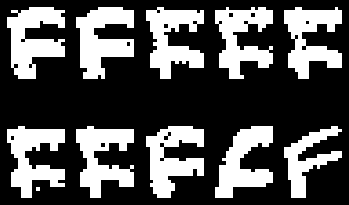

In [138]:
neurons = [images[0, :].shape[0], 200, 150, 100] #taille du réseau
dbn = DBN(neurons)
dbn, losses = dbn.pretrain_DBN(images, n_epoch=2000, lr_rate=0.001)
generated = dbn.generer_image_DBN(n_imgs, n_iter=n_iter)

# Deep Neural Network (DNN) on MNIST

In [9]:
def read_mnist():
    X_train, y_train = loadlocal_mnist(images_path='train-images-idx3-ubyte',
                         labels_path='train-labels-idx1-ubyte')
    X_test, y_test = loadlocal_mnist(images_path='t10k-images-idx3-ubyte',
                         labels_path='t10k-labels-idx1-ubyte')
    #On binarise les images
    X_train = np.where(X_train > 126, 1, 0)
    X_test = np.where(X_test > 126, 1, 0)
    #On encode les targets
    oh = OneHotEncoder()
    y_train = oh.fit_transform(y_train.reshape(-1,1)).toarray()
    y_test = oh.fit_transform(y_test.reshape(-1,1)).toarray()
    
    return X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = read_mnist()

In [11]:
# Valeurs des hyper paramètres
vect_DNN = [784, 100, 50, 10] #taille du réseau DNN
n_iter_RBM = 100
n_iter_DBN = 200
lr = 0.01
batch_size = 32

In [12]:
def cross_entropy(y_hat, y):
    loss = []
    for k in range(y.shape[0]):
        loss.append(np.sum([-y[k,j]*np.log(y_hat[k,j]) for j in range(y.shape[1])]))
    return loss

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(x))


def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)

To move from a DBN to a DNN, we have to simply remove the RBMs and connect the layers of the network with fully connected layers of neurons. The weights of the network can then be trained using backpropagation. This approach is known as pretraining, where the DBN is used to initialize the weights of the DNN. Pretraining has been shown to improve the performance of DNNs, especially when the amount of labeled data is limited.

In [14]:
class DNN(DBN):
    
    def __init__(self, neurons):
        super().__init__(neurons)
        
    def calcul_softmax(self, rbm, data):
        p_h, _ = rbm.entree_sortie_RBM(data, act='softmax')
        return p_h
        
    def entree_sortie_reseau(self, data):
        outputs = [data]
        for rbm in self.RBMs_list[:-1]:
            probas, _ = rbm.entree_sortie_RBM(outputs[-1])
            outputs.append(probas)
        outputs.append(self.calcul_softmax(self.RBMs_list[-1], outputs[-1]))
        return outputs

    def retropropagation(self, data, labels, batch_size=50, epochs=10000, lr_rate=0.01, verbose = True):
        n_samples = data.shape[0]
        loss = []
        
        for i in range(1, epochs + 1):
            loss_batches = []
            for z in range(0, n_samples, batch_size):
                batch = data[z:min(n_samples, z + batch_size), :]
                batch_labels = labels[z:min(n_samples, z + batch_size), :]
                outputs = self.entree_sortie_reseau(batch)
                last_layer = self.RBMs_list[-1]
                c = (outputs[-1] - batch_labels)
                last_layer.W -= lr_rate * outputs[-2].T @ c / batch_size
                last_layer.b -= lr_rate * np.mean(c, axis = 0) / batch_size
                for idx, rbm in reversed(list(enumerate(self.RBMs_list[:-1]))):
                    c = c@self.RBMs_list[idx+1].W.T * outputs[idx+1] * (1-outputs[idx+1])
                    rbm.W -= lr_rate / batch_size * outputs[idx].T @ c 
                    rbm.b -= lr_rate * np.mean(c, axis=0) 
                loss_batches += cross_entropy(outputs[-1], batch_labels)
            loss.append(np.mean(loss_batches))
            if verbose:
                if not(i % 25) or i == 1:
                    print(f"Epoch {i} out of {epochs}. CELoss value is {loss[-1]}")
        return self, loss

    def test_dnn(self, data, labels, verbose = True):
        for rbm in self.RBMs_list[:-1]:
            _, data = rbm.entree_sortie_RBM(data)
        preds = np.argmax(self.calcul_softmax(self.RBMs_list[-1], data),
                          axis=1)
        good_labels = 0
        #print(preds)
        for idx, pred in enumerate(preds):
            if pred == np.argmax(labels[idx]):
                good_labels += 1
        if verbose:
            print("The percentage of false labeled data is ",
              100*(labels.shape[0] - good_labels) / labels.shape[0])
        return 100*(labels.shape[0] - good_labels) / labels.shape[0]
    
    def get_pred(self, data):
        for rbm in self.RBMs_list[:-1]:
            _, data = rbm.entree_sortie_RBM(data)
        probs = self.calcul_softmax(self.RBMs_list[-1], data)
        return(probs)

This code defines a Deep Neural Network (DNN) class that inherits from a Deep Belief Network (DBN) class. The DNN is trained using backpropagation to fine-tune the weights learned by the DBN.

The DNN class has an __init__ method that calls the parent class's constructor __init__ method.

There is a calcul_softmax method that calculates the probability distribution of the output layer using the softmax activation function.

The entree_sortie_reseau method applies the RBMs in the DBN to the input data and returns the output probabilities of each layer.

The retropropagation method trains the DNN using backpropagation. The input data is split into mini-batches and the gradients are computed for each mini-batch. The gradients are used to update the weights in each RBM in the DBN.

The test_dnn method tests the performance of the DNN on a validation dataset. It calculates the percentage of correctly labeled data.

Finally, the get_pred method applies the DNN to a new dataset and returns the probability distribution of the output layer.

Epoch 1 out of 100, loss: 0.030189863985491682
Epoch 20 out of 100, loss: 0.02891482998204111
Epoch 40 out of 100, loss: 0.029296238529759443
Epoch 60 out of 100, loss: 0.029116836386344578
Epoch 80 out of 100, loss: 0.028820869308083905
Epoch 100 out of 100, loss: 0.02850189369956272
Epoch 1 out of 100, loss: 0.03534394982145237
Epoch 20 out of 100, loss: 0.023983848040750756
Epoch 40 out of 100, loss: 0.022983769920452556
Epoch 60 out of 100, loss: 0.022552557707830823
Epoch 80 out of 100, loss: 0.022270300475722
Epoch 100 out of 100, loss: 0.022017105677102994
Epoch 1 out of 100, loss: 0.10931966439085888
Epoch 20 out of 100, loss: 0.10460172854072539
Epoch 40 out of 100, loss: 0.10432417329072646
Epoch 60 out of 100, loss: 0.10431404722866916
Epoch 80 out of 100, loss: 0.10431328634093658
Epoch 100 out of 100, loss: 0.1043478667766514
Epoch 1 out of 200. CELoss value is 6.101868421164524
Epoch 25 out of 200. CELoss value is 0.40811134551440226
Epoch 50 out of 200. CELoss value is 0

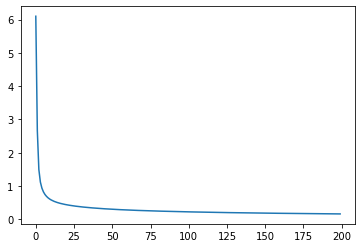

The percentage of false labeled data is  9.23


9.23

In [145]:
dnn = DNN(vect_DNN) #On initialise le DNN

dnn, losses = dnn.pretrain_DBN(X_train, batch_size = batch_size, n_epoch = n_iter_RBM) #On entraine de manière
                                                                                        #non supervisée

dnn, loss = dnn.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr)  #On entraine ensuite de manière supervisée
plt.plot(loss)
plt.show()

dnn.test_dnn(X_test, y_test)

In [146]:
probs = dnn.get_pred(X_test[:5])
probs

array([[8.51949376e-03, 1.56525497e-07, 5.17126218e-05, 9.26509808e-04,
        5.02245843e-07, 9.02434044e-05, 5.76317969e-07, 9.99668850e-01,
        2.27362531e-07, 1.29810627e-03],
       [5.16175777e-05, 2.25338795e-04, 9.99450274e-01, 3.95811462e-02,
        1.08196130e-08, 5.71813915e-06, 6.75336037e-03, 5.25540317e-10,
        3.08221586e-04, 6.94199758e-07],
       [5.11355657e-08, 9.84346994e-01, 9.17797705e-02, 5.68430026e-03,
        5.66203629e-04, 6.60031434e-03, 7.81340386e-06, 1.42600964e-04,
        2.54736600e-03, 7.59725718e-05],
       [9.99712693e-01, 5.36301302e-10, 1.38126592e-03, 1.64989303e-03,
        4.44327329e-03, 2.62050344e-05, 9.79816135e-05, 5.56392454e-06,
        9.17555467e-06, 5.86431288e-06],
       [2.46565283e-04, 1.95639158e-04, 7.03264109e-04, 1.05567089e-06,
        9.89476224e-01, 3.89374364e-05, 2.17031711e-03, 8.20572599e-04,
        5.56180719e-04, 2.01052738e-03]])

(<matplotlib.image.AxesImage at 0x7fc1c5921ee0>,
 array([8.51949376e-03, 1.56525497e-07, 5.17126218e-05, 9.26509808e-04,
        5.02245843e-07, 9.02434044e-05, 5.76317969e-07, 9.99668850e-01,
        2.27362531e-07, 1.29810627e-03]))

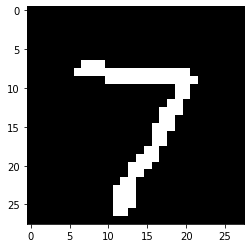

In [147]:
i=0
plt.imshow(X_test[i].reshape(28,28),cmap='gray'),probs[i]

# Analysis

## Number of layers

In [150]:
#Figure 1
grid = [[784, 10], [784, 200, 10], [784, 200, 200, 10], [784, 200, 200, 200, 10], [784, 200, 200, 200, 200, 10]]
list_train = []
list_pretrain = []
for vect in tqdm(grid):
    print(vect)
    dnn1 = DNN(vect)
    dnn2 = DNN(vect) # On initialise deux réseaux identiques
    dnn1, losses = dnn1.pretrain_DBN(X_train, batch_size = batch_size, n_epoch = n_iter_RBM, verbose = False) 
                                                            #On entraine de manière non supervisée
    #On entraine ensuite de manière supervisée
    dnn1, loss = dnn1.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    #On entraine celui-ci seulement de manière supervisée
    dnn2, loss = dnn2.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    list_train.append(dnn2.test_dnn(X_test, y_test, verbose = False))
    list_pretrain.append(dnn1.test_dnn(X_test, y_test, verbose = False))

  0%|          | 0/5 [00:00<?, ?it/s]

[784, 10]


/var/folders/f0/q7nn178n5cldx0lvl6yvbbn40000gn/T/ipykernel_39610/2300698629.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(x))
 20%|██        | 1/5 [26:30<1:46:03, 1590.81s/it]

[784, 200, 10]


 40%|████      | 2/5 [1:10:08<1:49:44, 2194.84s/it]

[784, 200, 200, 10]


 60%|██████    | 3/5 [2:03:59<1:28:56, 2668.19s/it]

[784, 200, 200, 200, 10]


 80%|████████  | 4/5 [3:09:03<52:35, 3155.79s/it]  

[784, 200, 200, 200, 200, 10]


100%|██████████| 5/5 [4:24:12<00:00, 3170.51s/it]


In [158]:
dnn2.test_dnn(X_test, y_test, verbose = True)

The percentage of false labeled data is  90.41


90.41

In [153]:
list_pretrain

[10.06, 5.65, 6.96, 7.23, 10.66]

In [154]:
list_train

[8.7, 8.29, 16.09, 90.43, 90.42]

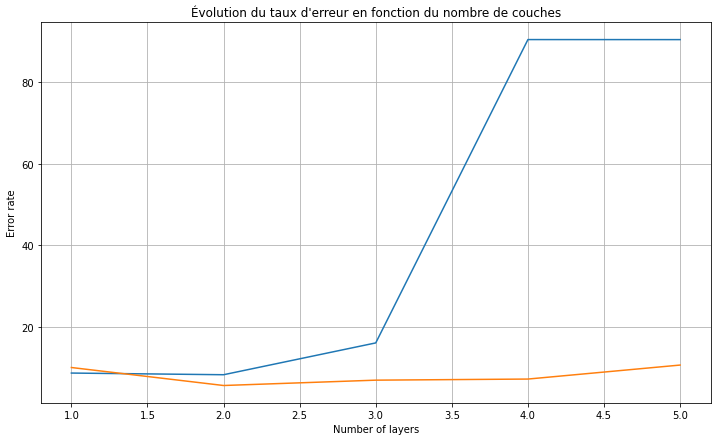

In [159]:
plt.figure(figsize=(12,7))
plt.title("Évolution du taux d'erreur en fonction du nombre de couches")
plt.xlabel('Number of layers')
plt.ylabel("Error rate")
plt.plot([1, 2, 3, 4, 5],list_train, label = 'réseau non preentrainé')
plt.plot([1, 2, 3, 4, 5],list_pretrain, label = 'réseau preentrainé')
plt.grid()
plt.show()

## Number of neurons by layer

In [161]:
#Figure 2
grid = [[784, 50, 50, 10], [784, 100, 100, 10],[784, 300, 300, 10], [784, 500, 500, 10], [784, 700, 700, 10]]
list_train = []
list_pretrain = []
for vect in tqdm(grid):
    print(vect)
    dnn1 = DNN(vect)
    dnn2 = DNN(vect) # On initialise deux réseaux identiques
    dnn1, losses = dnn1.pretrain_DBN(X_train, batch_size = batch_size, n_epoch = n_iter_RBM, verbose = False) 
                                                            #On entraine de manière non supervisée
    #On entraine ensuite de manière supervisée
    dnn1, loss = dnn1.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    #On entraine celui-ci seulement de manière supervisée
    dnn2, loss = dnn2.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    list_train.append(dnn2.test_dnn(X_test, y_test, verbose = False))
    list_pretrain.append(dnn1.test_dnn(X_test, y_test, verbose = False))
    print(list_train, list_pretrain)

  0%|          | 0/5 [00:00<?, ?it/s]

[784, 50, 50, 10]


 20%|██        | 1/5 [34:26<2:17:46, 2066.59s/it]

[20.68] [16.4]
[784, 100, 100, 10]


 40%|████      | 2/5 [1:13:28<1:51:25, 2228.52s/it]

[20.68, 17.98] [16.4, 9.66]
[784, 300, 300, 10]


 60%|██████    | 3/5 [2:29:59<1:50:14, 3307.14s/it]

[20.68, 17.98, 16.55] [16.4, 9.66, 7.32]
[784, 500, 500, 10]


 80%|████████  | 4/5 [4:34:04<1:22:20, 4940.93s/it]

[20.68, 17.98, 16.55, 15.41] [16.4, 9.66, 7.32, 7.38]
[784, 700, 700, 10]


100%|██████████| 5/5 [7:44:07<00:00, 5569.53s/it]  

[20.68, 17.98, 16.55, 15.41, 14.84] [16.4, 9.66, 7.32, 7.38, 7.72]


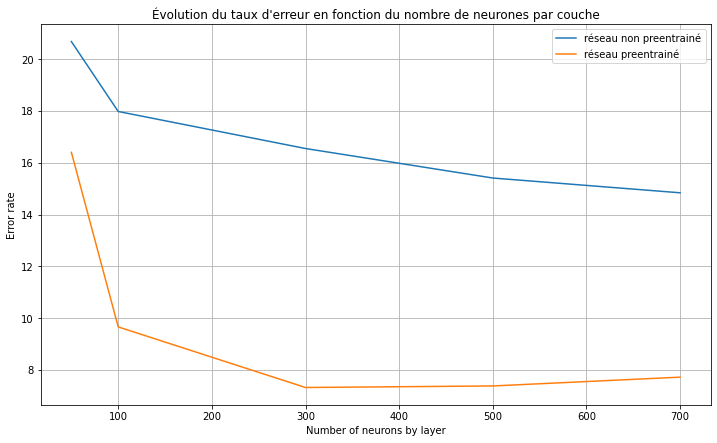

In [163]:
plt.figure(figsize=(12,7))
plt.title("Évolution du taux d'erreur en fonction du nombre de neurones par couche")
plt.xlabel('Number of neurons by layer')
plt.ylabel("Error rate")
plt.plot([50, 100, 300, 500, 700], list_train, label = 'réseau non preentrainé')
plt.plot([50, 100, 300, 500, 700], list_pretrain, label = 'réseau preentrainé')
plt.legend()
plt.grid()
plt.show()

## Number of data trained

In [165]:
#Figure 3: on choisit notre initialisation classique
grid = [1000, 3000, 7000, 10000, 30000, 60000]
vect = [784, 50, 50, 10]
list_train = []
list_pretrain = []
for limit in tqdm(grid):
    #On split notre base de donnée
    X_train_ex = X_train[:limit]
    y_train_ex = y_train[:limit]

    dnn1 = DNN(vect)
    dnn2 = DNN(vect) # On initialise deux réseaux identiques
    dnn1, losses = dnn1.pretrain_DBN(X_train_ex, batch_size = batch_size, n_epoch = n_iter_RBM, verbose = False) 
                                                            #On entraine de manière non supervisée
    #On entraine ensuite de manière supervisée
    dnn1, loss = dnn1.retropropagation(data = X_train_ex, labels = y_train_ex, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    #On entraine celui-ci seulement de manière supervisée
    dnn2, loss = dnn2.retropropagation(data = X_train_ex, labels = y_train_ex, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    list_train.append(dnn2.test_dnn(X_test, y_test, verbose = False))
    list_pretrain.append(dnn1.test_dnn(X_test, y_test, verbose = False))

100%|██████████| 6/6 [1:12:39<00:00, 726.54s/it] 


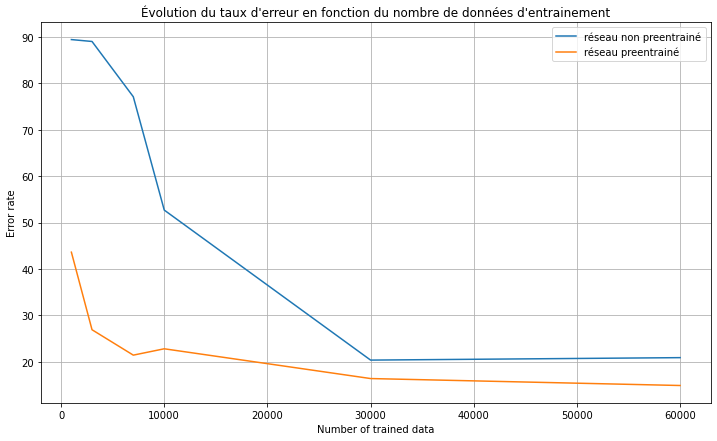

In [167]:
plt.figure(figsize=(12,7))
plt.title("Évolution du taux d'erreur en fonction du nombre de données d'entrainement")
plt.xlabel("Number of trained data")
plt.ylabel("Error rate")
plt.plot( [1000, 3000, 7000, 10000, 30000, 60000], list_train, label = 'réseau non preentrainé')
plt.plot([1000, 3000, 7000, 10000, 30000, 60000], list_pretrain, label = 'réseau preentrainé')
plt.grid()
plt.legend()
plt.show()

**=> As we can see on these 3 plots, the best model is maybe a pre trained network trained with 30 000 data, 300 neurons by layer and 2 layers.**

# Variational Auto Encoder (VAE)

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image

import pdb
import numpy as np
import matplotlib.pyplot as plt

def pytorch_to_numpy(x):
  return x.detach().numpy()

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <AFB7C78A-1D52-38B1-9D33-93A75FA7D528> /Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <9D4C7FD2-49A8-383A-AC3E-A560DE81B0D8> /Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


In [31]:
from torch.utils.data import TensorDataset, DataLoader

TensorDataset()

def array_to_dataloader(X):
    tensor_x = torch.Tensor(X)
    my_dataset = TensorDataset(tensor_x) 
    my_dataloader = DataLoader(my_dataset)
    return my_dataloader

In [16]:
class VAE(torch.nn.Module ):
    def __init__(self, x_dim, h_dim1, h_dim2, z_dim,n_rows,n_cols,n_channels):
        super(VAE, self).__init__()

        self.n_rows = n_rows
        self.n_cols = n_cols
        self.n_channels = n_channels
        self.n_pixels = (self.n_rows)*(self.n_cols)
        self.z_dim = z_dim

        # encoder part
        self.fc1 = nn.Linear(x_dim, h_dim1) #FILL IN STUDENT
        self.fc2 = nn.Linear(h_dim1, h_dim2) #FILL IN STUDENT
        self.fc31 = nn.Linear(h_dim2, z_dim) #FILL IN STUDENT
        self.fc32 = nn.Linear(h_dim2, z_dim) #FILL IN STUDENT
        # decoder part
        self.fc4 = nn.Linear(z_dim, h_dim2) #FILL IN STUDENT
        self.fc5 = nn.Linear(h_dim2, h_dim1) #FILL IN STUDENT
        self.fc6 = nn.Linear(h_dim1, x_dim) #FILL IN STUDENT
    

    def encoder(self, x):
        h = F.relu(self.fc1(x.view(-1, self.n_pixels))) #FILL IN STUDENT
        h = F.relu(self.fc2((h))) #FILL IN STUDENT
        return F.relu(self.fc31(h)), F.relu(self.fc32(h)) #FILL IN STUDENT (remember, there are two outputs)
                   
    def decoder(self, z):
        h = F.relu(self.fc4(z)) #FILL IN STUDENT
        h = F.relu(self.fc5(h)) #FILL IN STUDENT
        return F.sigmoid(self.fc6(h)).view(-1,n_channels, n_rows,n_cols) #FILL IN STUDENT

    def sampling(self, mu, log_var):
        # this function samples a Gaussian distribution, with average (mu) and standard deviation specified (using log_var)
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mu) # return z sample

    def forward(self, x):
        z_mu, z_log_var = self.encoder(x) #FILL IN STUDENT
        z = self.sampling(z_mu, z_log_var) #FILL IN STUDENT
        return self.decoder(z), z_mu, z_log_var

    def loss_function(self,x, y, mu, log_var):
        reconstruction_error = F.binary_cross_entropy(y.view(-1, self.n_pixels), x.view(-1, self.n_pixels), reduction='sum')

        KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

        return reconstruction_error + KLD

In [47]:
# autoencoder parameters
n_rows = int(np.sqrt(X_train.shape[1]))
n_cols = int(np.sqrt(X_train.shape[1]))
n_channels = 1
n_pixels = n_rows*n_cols

img_shape = (n_rows, n_cols, n_channels)
z_dim = 10 # number of labels here but you can change this as you wish
n_epochs = 50

In [18]:
# create model
vae_dim_1 = 512
vae_dim_2 = 256
vae_model = VAE(x_dim=n_pixels, h_dim1= vae_dim_1, h_dim2=vae_dim_2, z_dim=z_dim,n_rows=n_rows,n_cols=n_cols,n_channels=n_channels)
vae_optimizer = optim.Adam(vae_model.parameters())

In [20]:
print(vae_model)

VAE(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc31): Linear(in_features=256, out_features=10, bias=True)
  (fc32): Linear(in_features=256, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=784, bias=True)
)


In [45]:
def train_vae(vae_model,data_train_loader, vae_optimizer, epoch, verbose=True):
    train_loss = 0
    for batch_idx, data in tqdm(enumerate(data_train_loader)):
        data = data[0]
        vae_optimizer.zero_grad()
        y, z_mu, z_log_var = vae_model(data) #FILL IN STUDENT
        loss_vae = vae_model.loss_function(data, y, z_mu, z_log_var) #FILL IN STUDENT
        loss_vae.backward()
        train_loss += loss_vae.item()
        vae_optimizer.step() 
        
        if verbose:
            if batch_idx % 100 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(data_train_loader.dataset),
                100. * batch_idx / len(data_train_loader), loss_vae.item() / len(data)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(data_train_loader.dataset)))


In [43]:
train_loader = array_to_dataloader(X_train[:10000])

In [48]:
# train the model
for epoch in range(0, n_epochs):
    train_vae(vae_model,train_loader, vae_optimizer, epoch, verbose=False)

10000it [03:25, 48.77it/s]


====> Epoch: 0 Average loss: 165.3170


10000it [03:12, 51.96it/s]


====> Epoch: 1 Average loss: 164.7732


10000it [03:14, 51.53it/s]


====> Epoch: 2 Average loss: 164.3487


10000it [03:25, 48.76it/s]


====> Epoch: 3 Average loss: 164.3182


10000it [03:34, 46.59it/s]


====> Epoch: 4 Average loss: 163.8695


10000it [03:36, 46.16it/s]


====> Epoch: 5 Average loss: 163.4868


10000it [03:35, 46.36it/s]


====> Epoch: 6 Average loss: 163.5350


10000it [03:31, 47.28it/s]


====> Epoch: 7 Average loss: 163.2339


10000it [03:27, 48.14it/s]


====> Epoch: 8 Average loss: 163.4739


10000it [03:41, 45.20it/s]


====> Epoch: 9 Average loss: 162.8703


10000it [03:40, 45.30it/s]


====> Epoch: 10 Average loss: 162.5159


10000it [03:56, 42.33it/s]


====> Epoch: 11 Average loss: 162.2970


10000it [03:33, 46.80it/s]


====> Epoch: 12 Average loss: 162.1294


10000it [03:25, 48.58it/s]


====> Epoch: 13 Average loss: 162.1147


10000it [04:11, 39.78it/s]


====> Epoch: 14 Average loss: 161.7298


10000it [03:33, 46.93it/s]


====> Epoch: 15 Average loss: 161.5175


10000it [03:24, 48.95it/s]


====> Epoch: 16 Average loss: 161.9331


10000it [03:23, 49.03it/s]


====> Epoch: 17 Average loss: 161.8086


10000it [03:20, 49.76it/s]


====> Epoch: 18 Average loss: 161.4683


10000it [03:18, 50.37it/s]


====> Epoch: 19 Average loss: 161.7101


10000it [03:19, 50.08it/s]


====> Epoch: 20 Average loss: 161.6035


10000it [03:21, 49.61it/s]


====> Epoch: 21 Average loss: 161.6603


10000it [03:27, 48.13it/s]


====> Epoch: 22 Average loss: 161.9992


10000it [04:09, 40.04it/s]


====> Epoch: 23 Average loss: 161.5895


10000it [03:54, 42.65it/s]


====> Epoch: 24 Average loss: 161.4706


10000it [03:30, 47.41it/s]


====> Epoch: 25 Average loss: 161.4049


10000it [03:33, 46.81it/s]


====> Epoch: 26 Average loss: 161.4705


10000it [03:26, 48.33it/s]


====> Epoch: 27 Average loss: 161.4768


10000it [03:22, 49.46it/s]


====> Epoch: 28 Average loss: 161.7420


10000it [03:18, 50.34it/s]


====> Epoch: 29 Average loss: 161.5257


10000it [03:18, 50.41it/s]


====> Epoch: 30 Average loss: 162.0129


10000it [03:19, 50.19it/s]


====> Epoch: 31 Average loss: 161.9546


10000it [03:21, 49.68it/s]


====> Epoch: 32 Average loss: 161.7272


10000it [03:16, 50.93it/s]


====> Epoch: 33 Average loss: 161.4751


10000it [03:17, 50.58it/s]


====> Epoch: 34 Average loss: 161.6779


10000it [03:23, 49.08it/s]


====> Epoch: 35 Average loss: 161.8816


10000it [03:30, 47.55it/s]


====> Epoch: 36 Average loss: 161.6291


10000it [03:25, 48.69it/s]


====> Epoch: 37 Average loss: 161.7402


10000it [03:32, 47.13it/s]


====> Epoch: 38 Average loss: 162.0344


10000it [03:22, 49.39it/s]


====> Epoch: 39 Average loss: 161.9783


10000it [03:36, 46.17it/s]


====> Epoch: 40 Average loss: 161.7459


10000it [03:19, 50.23it/s]


====> Epoch: 41 Average loss: 161.7540


10000it [03:18, 50.30it/s]


====> Epoch: 42 Average loss: 161.8520


10000it [03:20, 49.85it/s]


====> Epoch: 43 Average loss: 161.6945


10000it [03:18, 50.39it/s]


====> Epoch: 44 Average loss: 161.8865


10000it [03:21, 49.69it/s]


====> Epoch: 45 Average loss: 161.8767


10000it [03:20, 49.99it/s]


====> Epoch: 46 Average loss: 162.1042


10000it [03:19, 50.12it/s]


====> Epoch: 47 Average loss: 162.4790


10000it [03:21, 49.64it/s]


====> Epoch: 48 Average loss: 162.4296


10000it [03:36, 46.27it/s]


====> Epoch: 49 Average loss: 162.4674


In [41]:
def test(vae, test_loader):
    vae.eval()
    test_loss= 0
    with torch.no_grad():
        for data in test_loader:
            data = data.cuda()
            recon, mu, log_var = vae(data)
            
            # sum up batch loss
            test_loss += loss_function(recon, data, mu, log_var).item()
        
    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

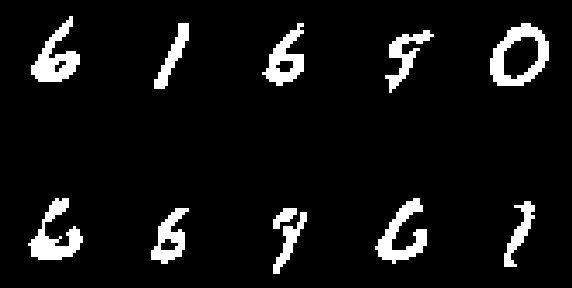

In [50]:
n_imgs = 10

fig, ax = plt.subplots(2, 5, figsize=(10, 6))
fig.patch.set_facecolor('black')
ax = ax.ravel()
with torch.no_grad():
    if torch.cuda.is_available():
        z = torch.randn(n_imgs, 2).cuda()
        sample = vae.decoder(z).cuda()
    else:
        z = torch.randn(n_imgs, 2)
        sample = vae.decoder(z)
    for i, img in enumerate(sample.view(10, 1, 28, 28)):
      img = img[0].numpy()
      img = 1 * (img >= 0.5)
      ax[i].imshow(img, cmap='gray')
      ax[i].axis('off')
plt.savefig('VAE generated digits.jpg')
plt.show()

Epoch 1 out of 100, loss: 0.01825636287511599
Epoch 20 out of 100, loss: 0.008553759387578092
Epoch 40 out of 100, loss: 0.007807746208001531
Epoch 60 out of 100, loss: 0.007594098607762749
Epoch 80 out of 100, loss: 0.007437081460741681
Epoch 100 out of 100, loss: 0.007322773877689147


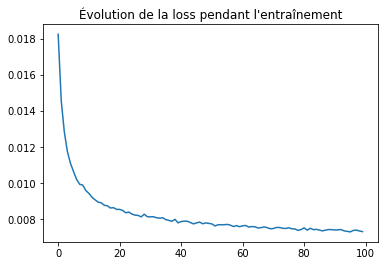

ValueError: cannot reshape array of size 784 into shape (20,16)

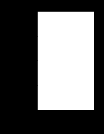

In [53]:
# Valeurs des hyper paramètres et entrainement
p = 784  # (égal à 28 * 28, la taille de l'image)
q = 600
rbm = RBM(p, q) # la taille du réseau est donc 784 * 600 = 470 400

epochs = 100
learning_rate = 0.01
batch_size = 32

RBM_trained, loss = rbm.train_RBM(X_train, epochs, learning_rate, batch_size)

plt.plot(loss)
plt.title("Évolution de la loss pendant l'entraînement")
plt.show()

n_iter = 1000
n_imgs = 10
RBM_trained.generer_image_RBM(n_imgs, n_iter, dataset='mnist')

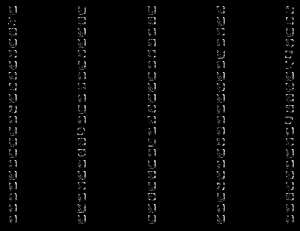

In [60]:
RBM_trained.generer_image_RBM(100, n_iter, dataset='mnist')

Epoch 1 out of 100, loss: 0.028911944026107292
Epoch 20 out of 100, loss: 0.01150595120667777
Epoch 40 out of 100, loss: 0.00980028046518538
Epoch 60 out of 100, loss: 0.008958235595504821
Epoch 80 out of 100, loss: 0.008397633052611186
Epoch 100 out of 100, loss: 0.008001860003754994
Epoch 1 out of 100, loss: 0.07775121578445368
Epoch 20 out of 100, loss: 0.03833868537877844
Epoch 40 out of 100, loss: 0.035748712257668486
Epoch 60 out of 100, loss: 0.03488045339418498
Epoch 80 out of 100, loss: 0.03443786586216037
Epoch 100 out of 100, loss: 0.034124851113424955
Epoch 1 out of 100, loss: 0.08889473019207386
Epoch 20 out of 100, loss: 0.05609484164471694
Epoch 40 out of 100, loss: 0.05336106036727556
Epoch 60 out of 100, loss: 0.05225250255940687
Epoch 80 out of 100, loss: 0.051424344575555975
Epoch 100 out of 100, loss: 0.05081433415292731


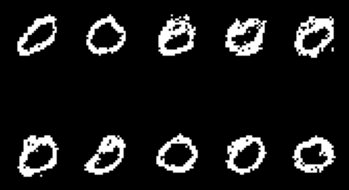

In [56]:
neurons = [X_train[0].shape[0], 400, 300, 100] 
# taille du réseau: 784 * 400 + 400 * 300 + 300 * 100 = 463 600
dbn = DBN(neurons)
dbn, losses = dbn.pretrain_DBN(X_train, n_epoch=100, lr_rate=0.001)
n_iter = 1000
n_imgs = 10
generated = dbn.generer_image_DBN(n_imgs, n_iter=n_iter, dataset='mnist')

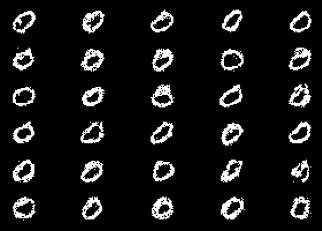

In [61]:
generated = dbn.generer_image_DBN(30, n_iter=n_iter, dataset='mnist')